<a href="https://colab.research.google.com/github/emarevalog/Machine_learning_project/blob/main/Exploraci%C3%B3n_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploración de datos

In [5]:
#Librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from google.colab import drive

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/emarevalog/Machine_learning_project/main/Hoja%20de%20c%C3%A1lculo%20sin%20t%C3%ADtulo%20-%20datos.csv?token=GHSAT0AAAAAACJX7ZO54CXHY5JZCDGOD2GMZKGNXUQ',
                 header = 0, sep=",")

In [7]:
#Cambios en los nombres de las variables
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("__", "_")
df.columns = df.columns.str.replace("Ndvi", "NDVI")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Mes                                      98 non-null     object 
 1   NDVI_Sat                                 98 non-null     float64
 2   Precipitación_Modelo_Swb                 98 non-null     float64
 3   Evapotranspiración_Actual_Modelo_Swb     98 non-null     float64
 4   Intercepción_Modelo_Swb                  98 non-null     float64
 5   Evapotranspiración_Potencial_Modelo_Swb  98 non-null     float64
 6   Humedad_Del_Suelo_Modelo_Swb             98 non-null     float64
 7   Recarga_Modelo_Swb                       98 non-null     float64
 8   Ml                                       0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 7.0+ KB


In [9]:
df.describe()

,NDVI_Sat,Precipitación_Modelo_Swb,Evapotranspiración_Actual_Modelo_Swb,Intercepción_Modelo_Swb,Evapotranspiración_Potencial_Modelo_Swb,Humedad_Del_Suelo_Modelo_Swb,Recarga_Modelo_Swb,Ml
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,0.0
mean,0.711767,151.913676,106.669505,21.775512,146.887084,6722.939078,12.234465,NaN
std,0.090996,72.193991,19.832796,10.584533,21.427457,1955.540528,19.079999,NaN
min,0.063083,14.795760,17.822530,1.924262,17.011936,1912.496048,0.002570,NaN
25%,0.679274,105.187433,99.242880,15.509617,139.599428,5229.304873,0.711093,NaN
50%,0.740135,140.245567,109.850645,23.939324,147.563997,6546.035467,3.914425,NaN
75%,0.766214,209.532113,120.515588,30.790270,158.017002,8501.649807,18.195738,NaN
max,0.798472,364.757331,142.040391,36.480872,185.793053,9919.101253,116.139752,NaN


In [17]:
df.head(10)

,Mes,NDVI_Sat,Precipitación_Modelo_Swb,Evapotranspiración_Actual_Modelo_Swb,Intercepción_Modelo_Swb,Evapotranspiración_Potencial_Modelo_Swb,Humedad_Del_Suelo_Modelo_Swb,Recarga_Modelo_Swb,Ml
0,1,0.668057,14.795760,67.777152,6.616557,137.253919,5739.043823,0.014533,NaN
1,2,0.594504,109.739020,67.710569,20.110346,121.178929,4845.755533,1.713434,NaN
2,3,0.637496,122.638363,84.763105,25.720141,144.200782,5375.022152,2.595513,NaN
3,4,0.651578,198.530119,109.409384,2.627605,139.970673,5813.085359,13.720075,NaN
4,5,0.766817,328.514942,113.587322,3.724465,121.613561,8524.530973,90.080310,NaN
5,6,0.777916,168.059744,118.723495,28.438454,136.037482,8820.114022,11.164395,NaN
6,7,0.744771,70.634819,109.789154,21.915038,139.695182,8518.170625,0.692007,NaN
7,8,0.762621,219.930710,122.117867,36.480872,140.892579,8385.601805,8.242845,NaN
8,9,0.752296,199.264907,127.395592,30.310903,144.868437,8886.369893,15.792482,NaN
9,10,0.761055,227.779457,130.497193,35.097546,142.959642,9561.741859,35.103994,NaN


In [10]:
print(df.columns)

Index(['Mes', 'NDVI_Sat', 'Precipitación_Modelo_Swb',
       'Evapotranspiración_Actual_Modelo_Swb', 'Intercepción_Modelo_Swb',
       'Evapotranspiración_Potencial_Modelo_Swb',
       'Humedad_Del_Suelo_Modelo_Swb', 'Recarga_Modelo_Swb', 'Ml'],
      dtype='object')


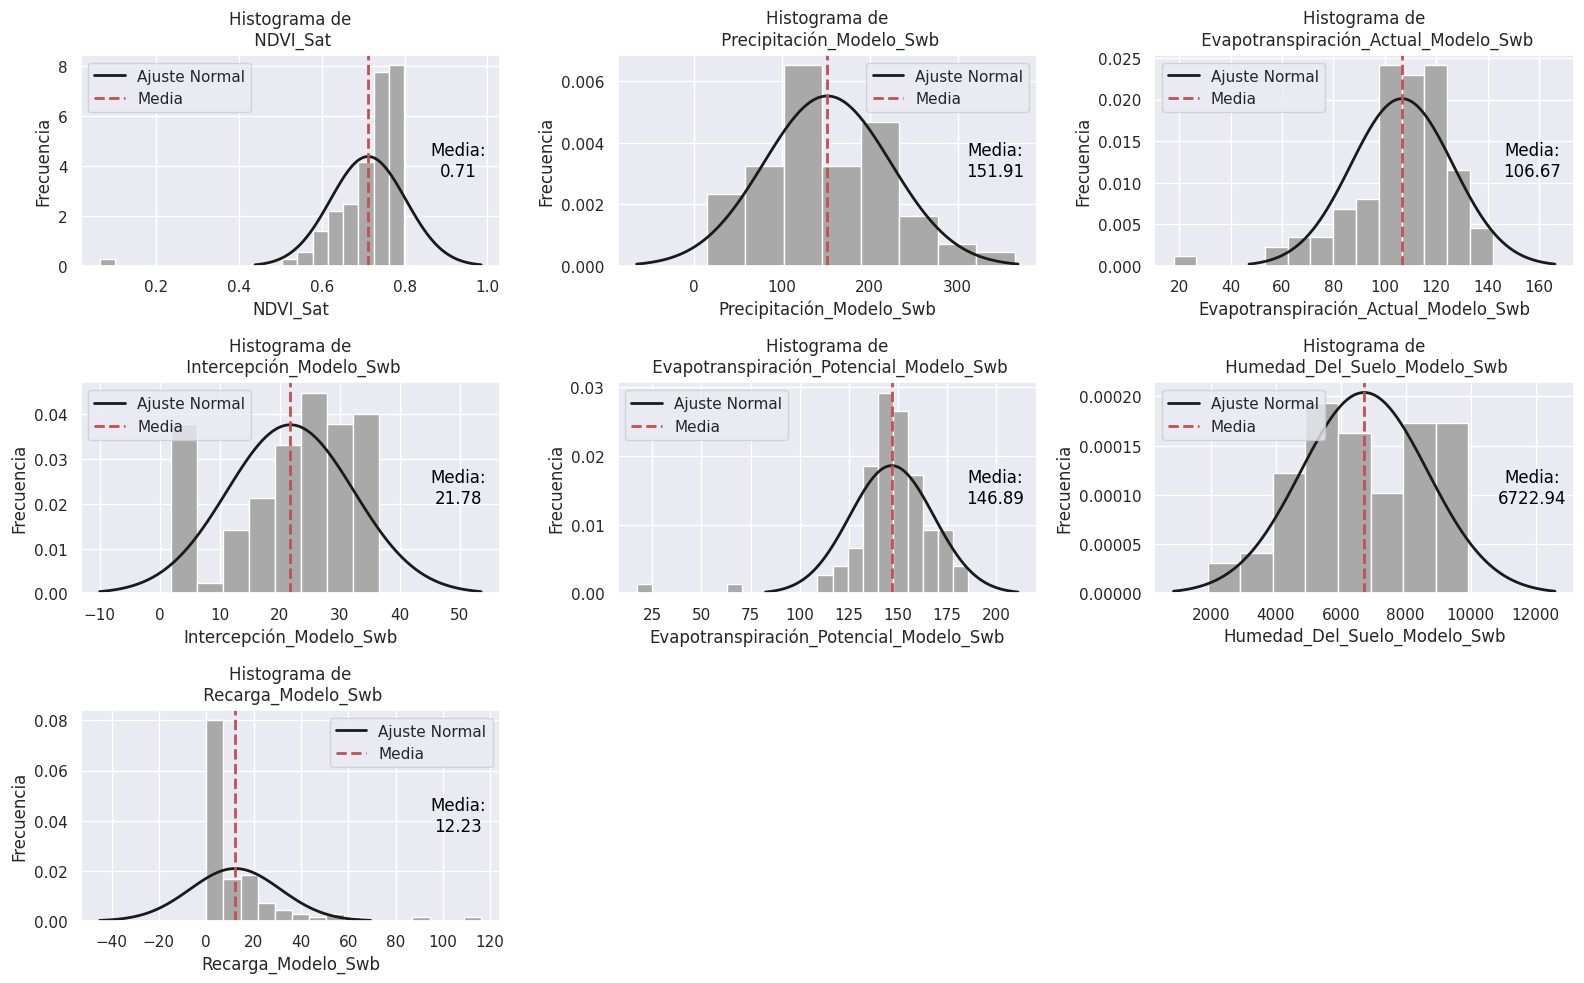

In [12]:
# Histogramas
# Lista de variables
variables = ['NDVI_Sat', 'Precipitación_Modelo_Swb',
       'Evapotranspiración_Actual_Modelo_Swb', 'Intercepción_Modelo_Swb',
       'Evapotranspiración_Potencial_Modelo_Swb',
       'Humedad_Del_Suelo_Modelo_Swb', 'Recarga_Modelo_Swb']

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
bar_color = 'darkgray'

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calcular la media y la desviación estándar de la variable
    mu, std = df[variable].mean(), df[variable].std()

    # Crear un rango de valores para la curva de mejor ajuste
    x_values = np.linspace(mu - 3 * std, mu + 3 * std, 100)

    # Calcular la curva de densidad de probabilidad (PDF) utilizando una distribución normal
    pdf = norm.pdf(x_values, mu, std)

    # Trazar el histograma
    ax.hist(df[variable], bins="auto", density=True, cumulative=False, color=bar_color)

    # Trazar la curva de mejor ajuste
    ax.plot(x_values, pdf, 'k-', lw=2, label='Ajuste Normal')

    # Agregar la línea vertical para la media
    ax.axvline(mu, color='r', linestyle='dashed', linewidth=2, label='Media')

    # Agregar el valor de la media
    ax.text(0.9, 0.5, f'Media:\n{mu:.2f}', transform=ax.transAxes, ha='center', va='center', color='black')

    ax.set_title(f'Histograma de\n {variable}', y=1.01)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

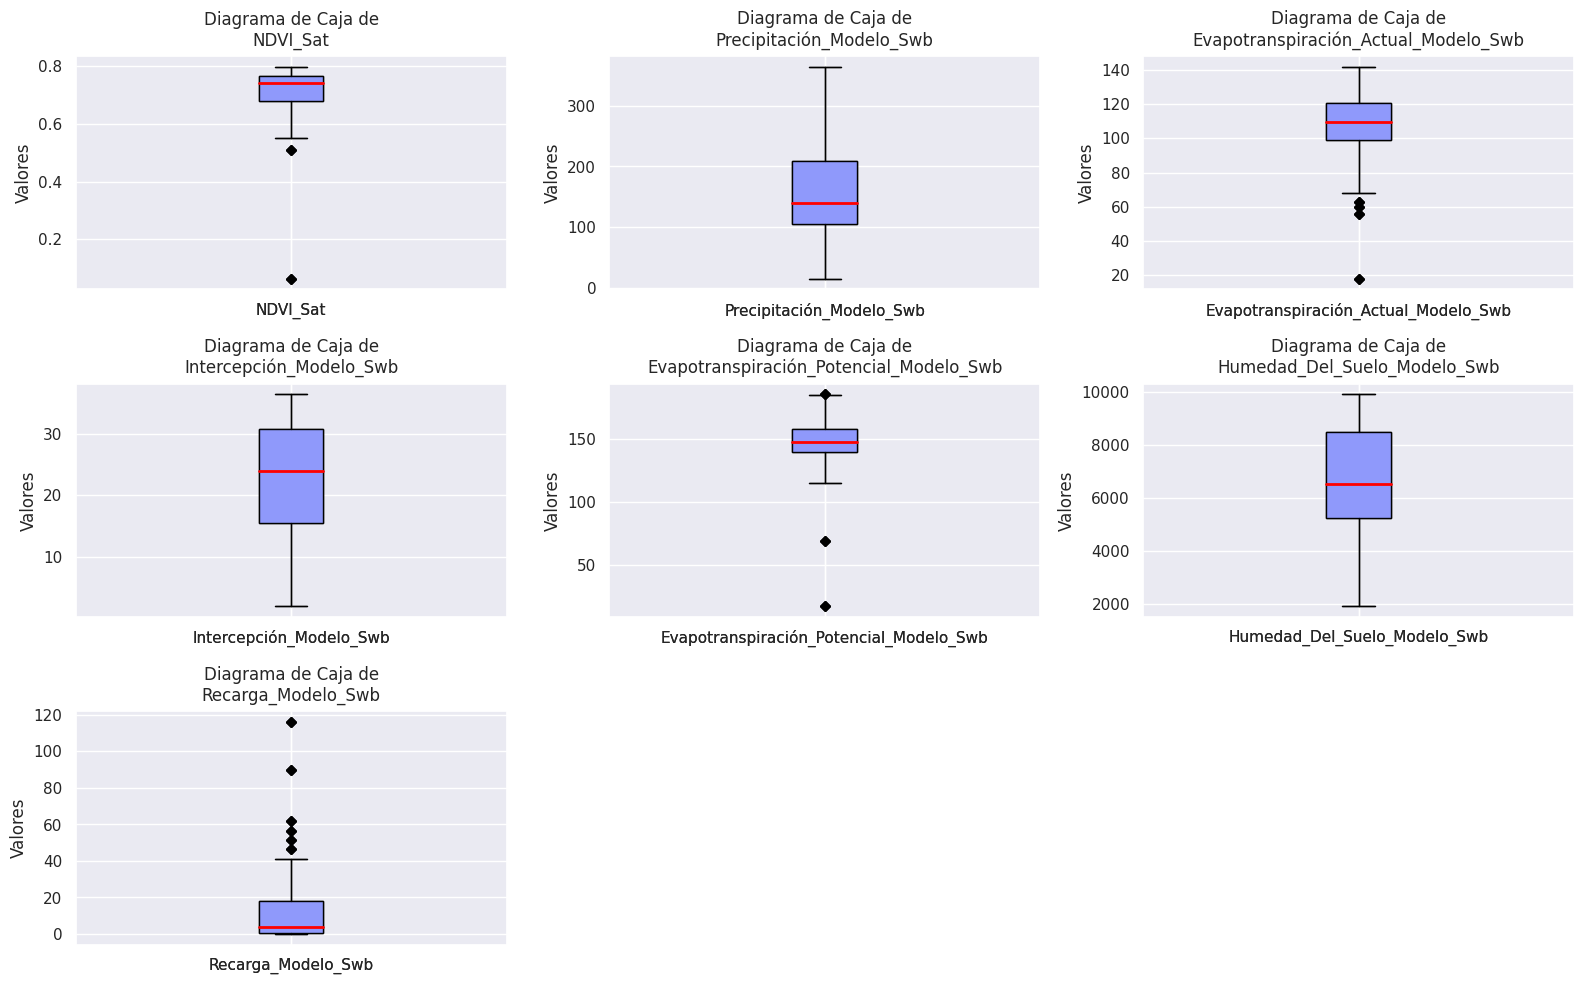

In [13]:
#Diagramas de cajas
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Crear un diagrama de caja vertical para la variable
    boxprops = dict(facecolor='xkcd:periwinkle blue', color='black')
    flierprops = dict(marker='D', markerfacecolor='black', markersize=5)

    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,
               boxprops=boxprops, flierprops=flierprops)

    medianprops = dict(linewidth=2, color='red')
    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,
               boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    ax.set_title(f'Diagrama de Caja de\n{variable}', y=1.01)
    ax.set_ylabel('Valores')

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

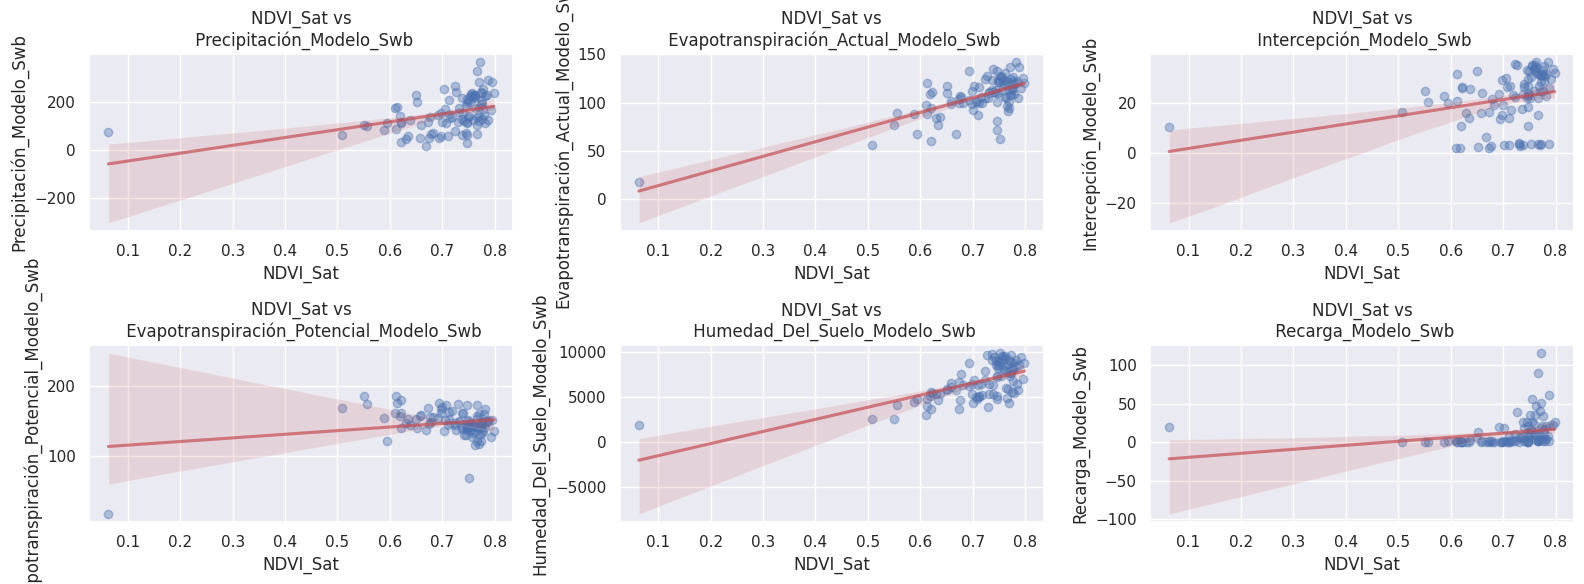

In [15]:
# Variables
x = 'NDVI_Sat'
y_variables = [ 'Precipitación_Modelo_Swb',
       'Evapotranspiración_Actual_Modelo_Swb', 'Intercepción_Modelo_Swb',
       'Evapotranspiración_Potencial_Modelo_Swb',
       'Humedad_Del_Suelo_Modelo_Swb', 'Recarga_Modelo_Swb']

plt.figure(figsize=(16, 6))
palette = sns.color_palette('hsv', len(y_variables))

# Crea subtramas para los gráficos de dispersión
for i, (y, color) in enumerate(zip(y_variables, palette), 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=x, y=y, data=df, scatter_kws={"alpha": 0.4}, line_kws={"color": "r", "alpha": 0.7})
    plt.title(f'{x} vs\n {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()

plt.show()

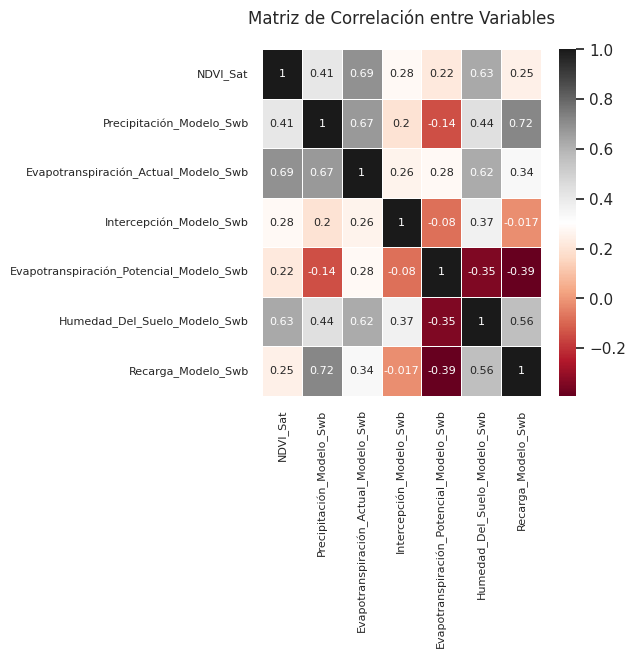

In [16]:
# Crea un subconjunto del DataFrame con las variables
df_numeric = df[variables]

# Calcula la matriz de correlación
matriz_correlacion = df_numeric.corr()

plt.figure(figsize=(4.5, 4.5))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='RdGy', linewidths=0.7,
            annot_kws={"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Matriz de Correlación entre Variables',y=1.05)

plt.show()